In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.linear_model import Ridge,ElasticNet
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

In [68]:
df = pd.read_csv('../data-14.csv', engine='python')

In [ ]:
df.groupby('rating_label')['rating_label'].agg(['count'])

In [71]:
df.rating_label = df.rating_label.str.strip()

In [72]:
df['rating_label'] = df['rating_label'].replace(['Excellent','Exceptional','Pleasant','Very Good','Wonderful','Good','Fair'],
                        [7, 6, 5, 4, 3, 2, 1])

In [76]:
df.total_reviews = df.total_reviews.apply(lambda x: x.replace('reviews', '').replace(',', ''))

In [77]:
df.total_reviews = df.total_reviews.astype('int64')

In [79]:
df[df.couple_review.str.len() == 81]['couple_review'][411]

'Couples in particular like the location – they rated it 10 for a two-person trip.'

In [80]:
df['couple_review_rating'] = df.couple_review.apply(lambda x: x.split()[10])

In [81]:
df.couple_review_rating = df.couple_review_rating.astype('float64')

In [82]:
for col in ['very_good_Fitness_Center', 'WiFi',
       'non-smoking_rooms', 'swimming_Pool', 'disabled_guest', 'Room Service',
       'parking', 'bar', 'tea/coffee maker', 'breakfast', 'spa',]:
    df[col] = df[col].astype(int)

In [83]:
df.dtypes

hotel_label                  object
City                         object
rating_score                float64
rating_label                  int64
total_reviews                 int64
best_facility                object
best_review_score_badge     float64
detail                       object
couple_review                object
important_facility           object
price                        object
very_good_Fitness_Center      int64
WiFi                          int64
non-smoking_rooms             int64
swimming_Pool                 int64
disabled_guest                int64
Room Service                  int64
parking                       int64
bar                           int64
tea/coffee maker              int64
breakfast                     int64
spa                           int64
couple_review_rating        float64
dtype: object

In [122]:
df

,rating_score,rating_label,total_reviews,best_review_score_badge,very_good_Fitness_Center,WiFi,non-smoking_rooms,swimming_Pool,disabled_guest,Room Service,parking,bar,tea/coffee maker,breakfast,spa,couple_review_rating
0,0.553191,0.166667,0.407585,0.629630,0,1,0,1,1,1,0,0,0,0,0,0.50
1,0.489362,0.166667,0.825732,0.333333,1,1,0,1,1,0,0,0,0,0,1,0.10
2,0.765957,1.000000,0.008161,0.592593,0,1,0,1,1,0,1,0,0,0,0,0.35
3,0.787234,1.000000,0.052328,0.629630,0,0,0,1,1,1,0,0,0,1,1,0.50
4,0.361702,0.666667,0.003094,0.222222,0,1,0,1,0,0,1,0,0,0,0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,0.617021,0.500000,0.009548,0.481481,0,1,0,0,1,0,0,0,0,1,0,0.00
1508,0.638298,0.500000,0.011415,0.407407,0,1,0,0,1,0,0,0,0,1,0,0.00
1509,0.510638,0.166667,0.001280,0.814815,0,1,0,0,0,0,0,0,0,0,0,0.85
1510,0.936170,0.833333,0.000373,0.888889,0,1,0,0,0,0,0,0,0,0,0,1.00


In [84]:
df.drop(['hotel_label', 'City', 'important_facility','detail','best_facility', 'couple_review', 'price'], axis=1, inplace=True)

In [85]:
df.columns

Index(['rating_score', 'rating_label', 'total_reviews',
       'best_review_score_badge', 'very_good_Fitness_Center', 'WiFi',
       'non-smoking_rooms', 'swimming_Pool', 'disabled_guest', 'Room Service',
       'parking', 'bar', 'tea/coffee maker', 'breakfast', 'spa',
       'couple_review_rating'],
      dtype='object')

In [86]:
for col in ['rating_score', 'rating_label', 'total_reviews',
       'best_review_score_badge', 'couple_review_rating']:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [87]:
X = df.drop('rating_score', axis=1)

In [88]:
Y = df['rating_score']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=123)

In [90]:
X_train.shape, y_train.shape

((1134, 15), (1134,))

In [91]:
X_test.shape, y_test.shape

((378, 15), (378,))

In [92]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [93]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [94]:
print("Linear regression accuracy for training set: {}%".format(round(clf.score(X_train, y_train),5) *100))
print("Linear regression accuracy for test set: {}%".format(round(clf.score(X_test, y_test),5) *100))

Linear regression accuracy for training set: 53.974%
Linear regression accuracy for test set: 49.971%


In [95]:
regr = MLPRegressor(learning_rate="adaptive", hidden_layer_sizes=1000, random_state=1, max_iter=500, solver="lbfgs",
                   learning_rate_init=0.01)

In [96]:
regr.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=1000, learning_rate='adaptive',
             learning_rate_init=0.01, max_iter=500, random_state=1,
             solver='lbfgs')

In [97]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [98]:
print("Multi-layer Perceptron regressor accuracy for training set: {}%".format(round(regr.score(X_train, y_train),5) *100))
print("Multi-layer Perceptron regressor accuracy for test set: {}%".format(round(regr.score(X_test, y_test),5) *100))

Multi-layer Perceptron regressor accuracy for training set: 96.104%
Multi-layer Perceptron regressor accuracy for test set: 76.626%


In [99]:
clf = svm.SVR()
clf.fit(X_train,y_train)

SVR()

In [106]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [107]:
score = r2_score(y_test, y_pred_test)

In [108]:
print("Support Vector Machine regression accuracy for training set: {}%".format(round(clf.score(X_train, y_train),5) *100))
print("Support Vector Machine regression accuracy for test set: {}%".format(round(clf.score(X_test, y_test),5) *100))

Support Vector Machine regression accuracy for training set: 48.823%
Support Vector Machine regression accuracy for test set: 45.958%


In [109]:
clf = SGDRegressor(max_iter=1000, tol=1e-3)

In [110]:
clf.fit(X_train,y_train)

SGDRegressor()

In [111]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [112]:
score = r2_score(y_test, y_pred_test)

In [113]:
print("Stochastic Gradient Descent accuracy for training set: {}%".format(round(clf.score(X_train, y_train),5) *100))
print("Stochastic Gradient Descent accuracy for test set: {}%".format(round(clf.score(X_test, y_test),5) *100))

Stochastic Gradient Descent accuracy for training set: 49.067%
Stochastic Gradient Descent accuracy for test set: 46.104%


In [ ]:
clf = KNeighborsRegressor(n_neighbors=2)

In [ ]:
clf.fit(X_train,y_train)

In [114]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [115]:
score = r2_score(y_test, y_pred_test)

In [116]:
print("KNN regression accuracy for training set: {}%".format(round(clf.score(X_train, y_train),5) *100))
print("KNN regression accuracy for test set:{}%".format(round(clf.score(X_test, y_test),5) *100))

KNN regression accuracy for training set: 49.067%
KNN regression accuracy for test set:46.104%


In [117]:
clf = RandomForestRegressor()

In [118]:
clf.fit(X_train,y_train)

RandomForestRegressor()

In [119]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [120]:
score = r2_score(y_test, y_pred_test)

In [121]:
print("Random Forest regressor accuracy for training set: {}%".format(round(clf.score(X_train, y_train),5) *100))
print("Random Forest regressor accuracy for test set:{}%".format(round(clf.score(X_test, y_test),5) *100))

Random Forest regressor accuracy for training set: 98.70100000000001%
Random Forest regressor accuracy for test set:90.50399999999999%


In [123]:
df = pd.read_csv('../data-14.csv', engine='python')

In [125]:
df['couple_review_rating'] = df.couple_review.apply(lambda x: x.split()[10])

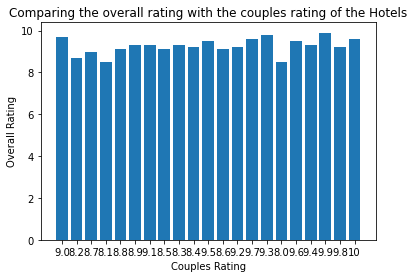

In [ ]:
plt.bar(df['couple_review_rating'],df['rating_score'])

plt.xlabel('Couples Rating')
plt.ylabel('Overall Rating')

plt.title('Comparing the overall rating with the couples rating of the Hotels')

plt.show()

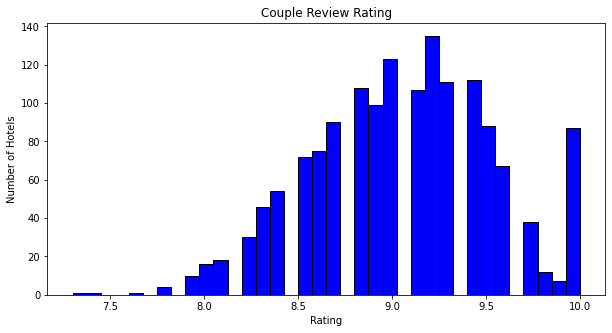

In [137]:
#plot the graph of best review score badge
plt.figure(figsize=(10, 5))
df.sort_values(by=['couple_review_rating'], ascending=False)
plt.hist(df['best_review_score_badge'], color='blue', edgecolor='black', bins=int(180/5))
plt.title('Couple Review Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Hotels')
plt.show()